<a href="https://colab.research.google.com/github/ojasdeshpande10/CNNbasedmultilabelclassifier/blob/main/testing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz 


--2021-02-14 21:42:50--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.12.102
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.12.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz.2’

GoogleNews-vectors- 100%[===================>]   1.53G  39.7MB/s    in 38s     

2021-02-14 21:43:28 (41.6 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz.2’ saved [1647046227/1647046227]



In [ ]:
from gensim import models

word2vec = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

# New Section

In [ ]:

#Reading training data as a pandas dataframe

import pandas as pd
art=pd.read_excel('/content/Training_Data.01 (1).xlsx')
art['Business Description']=art['Business Description'].astype(str)
art.head(5)

,Company Name,Business Description,Industry Classification Tag
0,"ADSOUTH PARTNERS, INC.","Adsouth Partners, Inc. provides advertising ag...",Advertising
1,"Artec Global Media, Inc.","Artec Global Media, Inc., formerly Artec Consu...",Advertising
2,Betawave Corp.,Betawave Corporation provides online marketing...,Advertising
3,BOSTON OMAHA Corp,Boston Omaha Corporation is engaged in the bus...,Advertising
4,Bright Mountain Media Inc,"Bright Mountain Media, Inc. is a digital media...",Advertising


In [ ]:

#Cleaning data in Business description column

import multiprocessing
import gensim
import nltk
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from os import listdir
from os.path import isfile, join
#nltk.download()
import string 
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import pickle 
import pandas as pd 
import os
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt
from gensim.models.deprecated.doc2vec import LabeledSentence
data=art['Business Description']
def clean(text):
    #convert the text to lower case
    text=text.lower()
    #remove punctuation marks
    table = str.maketrans("", "", string.punctuation)
    wnl = nltk.WordNetLemmatizer()
    
    
    text=text.translate(table)
    #tokenize words
    token = nltk.word_tokenize(text)
   
    #remove stop words like the,a,is etc

    stop_words = set(stopwords.words('english'))
    filtered_sentence = []

    for w in token:
        if w not in stop_words:
            filtered_sentence.append(w)
   
    token=filtered_sentence
    #lemmatize the data by stemming the words with similar meaning and organization
    token=[wnl.lemmatize(t) for t in token]
   
    return token

new_data=[]
final_text=[]
for d in data:
    d=clean(d)
    new_data.append(d)
data=new_data

result = [' '.join(sen) for sen in new_data]




print("data cleaned")

art['Better_Desc']=data
art['Final_text']=result
train=art
art.head()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
data cleaned


,Company Name,Business Description,Industry Classification Tag,Better_Desc,Final_text
0,"ADSOUTH PARTNERS, INC.","Adsouth Partners, Inc. provides advertising ag...",Advertising,"[adsouth, partner, inc, provides, advertising,...",adsouth partner inc provides advertising agenc...
1,"Artec Global Media, Inc.","Artec Global Media, Inc., formerly Artec Consu...",Advertising,"[artec, global, medium, inc, formerly, artec, ...",artec global medium inc formerly artec consult...
2,Betawave Corp.,Betawave Corporation provides online marketing...,Advertising,"[betawave, corporation, provides, online, mark...",betawave corporation provides online marketing...
3,BOSTON OMAHA Corp,Boston Omaha Corporation is engaged in the bus...,Advertising,"[boston, omaha, corporation, engaged, business...",boston omaha corporation engaged business vari...
4,Bright Mountain Media Inc,"Bright Mountain Media, Inc. is a digital media...",Advertising,"[bright, mountain, medium, inc, digital, mediu...",bright mountain medium inc digital medium hold...


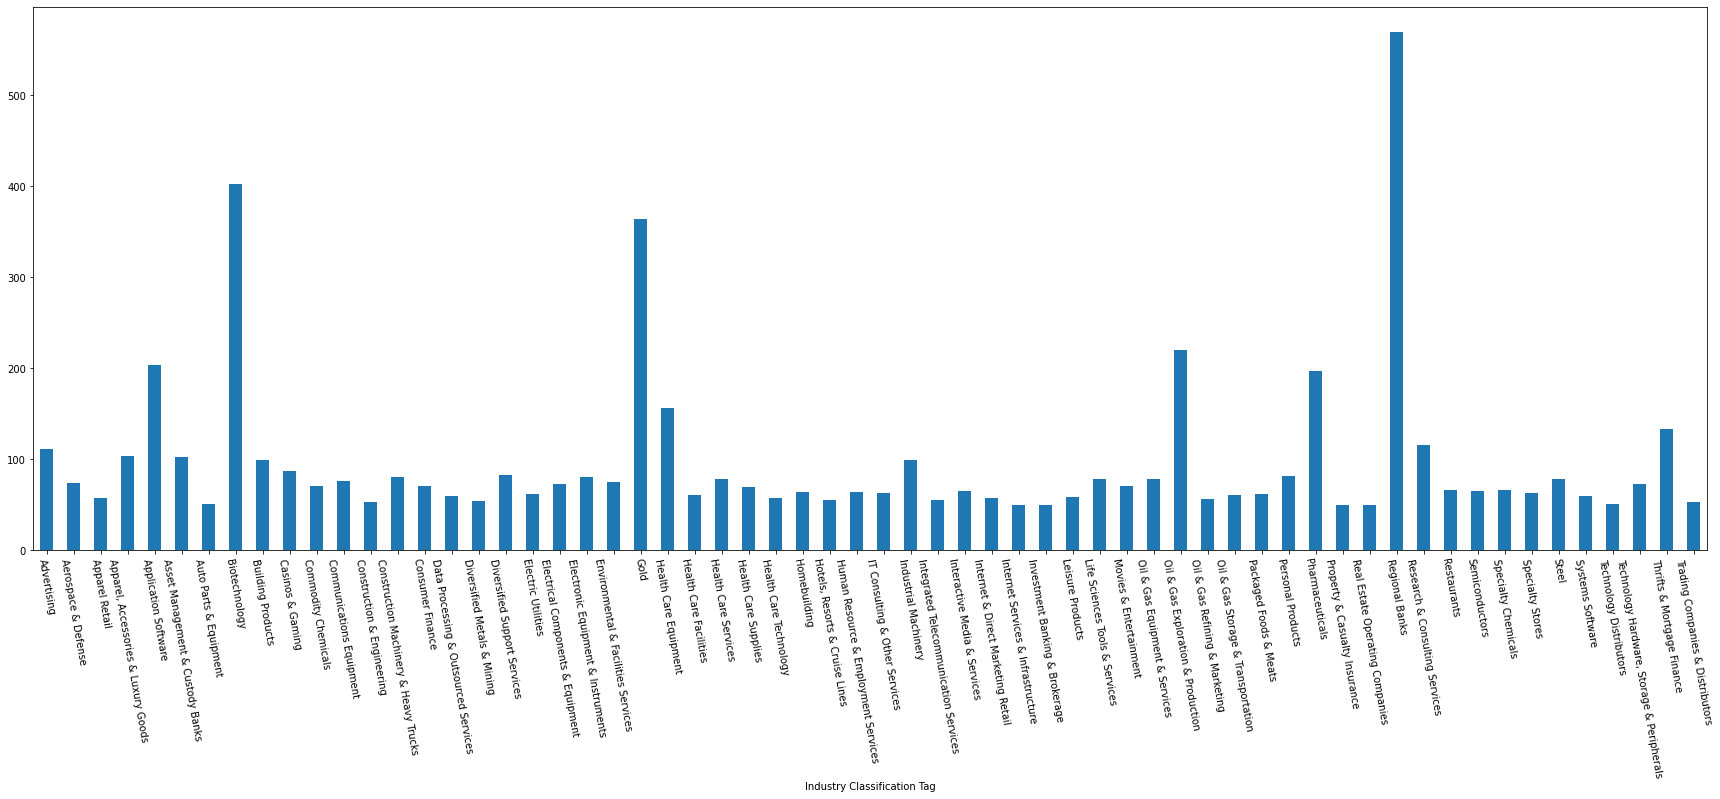

In [ ]:
df=train.groupby(['Industry Classification Tag'])['Company Name'].nunique()
ax = df.plot.bar(x='Industry Classification Tag', y='df', rot=10000,figsize=(30,10))



In [ ]:
#Creating the array for all classification tags which will help in one hot encoding of the tags

label=[]
label_names=[]
count=0;
for i in range(len(train)):
  label=set(label)
  if train.iloc[i,2] not in label:
    #print(train.iloc[i,2])
    label.add(train.iloc[i,2])
    label_names.append(train.iloc[i,2])
print(label_names)

['Advertising', 'Aerospace & Defense', 'Apparel Retail', 'Apparel, Accessories & Luxury Goods', 'Application Software', 'Asset Management & Custody Banks', 'Auto Parts & Equipment', 'Biotechnology', 'Building Products', 'Casinos & Gaming', 'Commodity Chemicals', 'Communications Equipment', 'Construction & Engineering', 'Construction Machinery & Heavy Trucks', 'Consumer Finance', 'Data Processing & Outsourced Services', 'Diversified Metals & Mining', 'Diversified Support Services', 'Electric Utilities', 'Electrical Components & Equipment', 'Electronic Equipment & Instruments', 'Environmental & Facilities Services', 'Gold', 'Health Care Equipment', 'Health Care Facilities', 'Health Care Services', 'Health Care Supplies', 'Health Care Technology', 'Homebuilding', 'Hotels, Resorts & Cruise Lines', 'Human Resource & Employment Services', 'Industrial Machinery', 'Integrated Telecommunication Services', 'Interactive Media & Services', 'Internet & Direct Marketing Retail', 'Internet Services &

In [ ]:
#Intializing the classification tags as new columns
for l in label_names:
  train[l]=0

In [ ]:
print(train.shape)
train.head()

(6045, 67)


,Company Name,Business Description,Industry Classification Tag,Better_Desc,Final_text,Advertising,Aerospace & Defense,Apparel Retail,"Apparel, Accessories & Luxury Goods",Application Software,Asset Management & Custody Banks,Auto Parts & Equipment,Biotechnology,Building Products,Casinos & Gaming,Commodity Chemicals,Communications Equipment,Construction & Engineering,Construction Machinery & Heavy Trucks,Consumer Finance,Data Processing & Outsourced Services,Diversified Metals & Mining,Diversified Support Services,Electric Utilities,Electrical Components & Equipment,Electronic Equipment & Instruments,Environmental & Facilities Services,Gold,Health Care Equipment,Health Care Facilities,Health Care Services,Health Care Supplies,Health Care Technology,Homebuilding,"Hotels, Resorts & Cruise Lines",Human Resource & Employment Services,Industrial Machinery,Integrated Telecommunication Services,Interactive Media & Services,Internet & Direct Marketing Retail,Internet Services & Infrastructure,Investment Banking & Brokerage,IT Consulting & Other Services,Leisure Products,Life Sciences Tools & Services,Movies & Entertainment,Oil & Gas Equipment & Services,Oil & Gas Exploration & Production,Oil & Gas Refining & Marketing,Oil & Gas Storage & Transportation,Packaged Foods & Meats,Personal Products,Pharmaceuticals,Property & Casualty Insurance,Real Estate Operating Companies,Regional Banks,Research & Consulting Services,Restaurants,Semiconductors,Specialty Chemicals,Specialty Stores,Steel,Systems Software,Technology Distributors,"Technology Hardware, Storage & Peripherals",Thrifts & Mortgage Finance,Trading Companies & Distributors
0,"ADSOUTH PARTNERS, INC.","Adsouth Partners, Inc. provides advertising ag...",Advertising,"[adsouth, partner, inc, provides, advertising,...",adsouth partner inc provides advertising agenc...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Artec Global Media, Inc.","Artec Global Media, Inc., formerly Artec Consu...",Advertising,"[artec, global, medium, inc, formerly, artec, ...",artec global medium inc formerly artec consult...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Betawave Corp.,Betawave Corporation provides online marketing...,Advertising,"[betawave, corporation, provides, online, mark...",betawave corporation provides online marketing...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,BOSTON OMAHA Corp,Boston Omaha Corporation is engaged in the bus...,Advertising,"[boston, omaha, corporation, engaged, business...",boston omaha corporation engaged business vari...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bright Mountain Media Inc,"Bright Mountain Media, Inc. is a digital media...",Advertising,"[bright, mountain, medium, inc, digital, mediu...",bright mountain medium inc digital medium hold...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#One hot encoding of the relevant classification tags
for i in range(len(train)):
  l=train.iloc[i,2]
  train.loc[i,l]=1
train.head()


,Company Name,Business Description,Industry Classification Tag,Better_Desc,Final_text,Advertising,Aerospace & Defense,Apparel Retail,"Apparel, Accessories & Luxury Goods",Application Software,Asset Management & Custody Banks,Auto Parts & Equipment,Biotechnology,Building Products,Casinos & Gaming,Commodity Chemicals,Communications Equipment,Construction & Engineering,Construction Machinery & Heavy Trucks,Consumer Finance,Data Processing & Outsourced Services,Diversified Metals & Mining,Diversified Support Services,Electric Utilities,Electrical Components & Equipment,Electronic Equipment & Instruments,Environmental & Facilities Services,Gold,Health Care Equipment,Health Care Facilities,Health Care Services,Health Care Supplies,Health Care Technology,Homebuilding,"Hotels, Resorts & Cruise Lines",Human Resource & Employment Services,Industrial Machinery,Integrated Telecommunication Services,Interactive Media & Services,Internet & Direct Marketing Retail,Internet Services & Infrastructure,Investment Banking & Brokerage,IT Consulting & Other Services,Leisure Products,Life Sciences Tools & Services,Movies & Entertainment,Oil & Gas Equipment & Services,Oil & Gas Exploration & Production,Oil & Gas Refining & Marketing,Oil & Gas Storage & Transportation,Packaged Foods & Meats,Personal Products,Pharmaceuticals,Property & Casualty Insurance,Real Estate Operating Companies,Regional Banks,Research & Consulting Services,Restaurants,Semiconductors,Specialty Chemicals,Specialty Stores,Steel,Systems Software,Technology Distributors,"Technology Hardware, Storage & Peripherals",Thrifts & Mortgage Finance,Trading Companies & Distributors
0,"ADSOUTH PARTNERS, INC.","Adsouth Partners, Inc. provides advertising ag...",Advertising,"[adsouth, partner, inc, provides, advertising,...",adsouth partner inc provides advertising agenc...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Artec Global Media, Inc.","Artec Global Media, Inc., formerly Artec Consu...",Advertising,"[artec, global, medium, inc, formerly, artec, ...",artec global medium inc formerly artec consult...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Betawave Corp.,Betawave Corporation provides online marketing...,Advertising,"[betawave, corporation, provides, online, mark...",betawave corporation provides online marketing...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,BOSTON OMAHA Corp,Boston Omaha Corporation is engaged in the bus...,Advertising,"[boston, omaha, corporation, engaged, business...",boston omaha corporation engaged business vari...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bright Mountain Media Inc,"Bright Mountain Media, Inc. is a digital media...",Advertising,"[bright, mountain, medium, inc, digital, mediu...",bright mountain medium inc digital medium hold...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.tail()

,Company Name,Business Description,Industry Classification Tag,Better_Desc,Final_text,Advertising,Aerospace & Defense,Apparel Retail,"Apparel, Accessories & Luxury Goods",Application Software,Asset Management & Custody Banks,Auto Parts & Equipment,Biotechnology,Building Products,Casinos & Gaming,Commodity Chemicals,Communications Equipment,Construction & Engineering,Construction Machinery & Heavy Trucks,Consumer Finance,Data Processing & Outsourced Services,Diversified Metals & Mining,Diversified Support Services,Electric Utilities,Electrical Components & Equipment,Electronic Equipment & Instruments,Environmental & Facilities Services,Gold,Health Care Equipment,Health Care Facilities,Health Care Services,Health Care Supplies,Health Care Technology,Homebuilding,"Hotels, Resorts & Cruise Lines",Human Resource & Employment Services,Industrial Machinery,Integrated Telecommunication Services,Interactive Media & Services,Internet & Direct Marketing Retail,Internet Services & Infrastructure,Investment Banking & Brokerage,IT Consulting & Other Services,Leisure Products,Life Sciences Tools & Services,Movies & Entertainment,Oil & Gas Equipment & Services,Oil & Gas Exploration & Production,Oil & Gas Refining & Marketing,Oil & Gas Storage & Transportation,Packaged Foods & Meats,Personal Products,Pharmaceuticals,Property & Casualty Insurance,Real Estate Operating Companies,Regional Banks,Research & Consulting Services,Restaurants,Semiconductors,Specialty Chemicals,Specialty Stores,Steel,Systems Software,Technology Distributors,"Technology Hardware, Storage & Peripherals",Thrifts & Mortgage Finance,Trading Companies & Distributors
6040,Willis Lease Finance Corporation,Willis Lease Finance Corporation along with it...,Trading Companies & Distributors,"[willis, lease, finance, corporation, along, s...",willis lease finance corporation along subsidi...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6041,WindGen Energy Inc,"WindGen Energy, Inc. (WindGen) is focused on w...",Trading Companies & Distributors,"[windgen, energy, inc, windgen, focused, wind,...",windgen energy inc windgen focused wind energy...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6042,XLI Technologies Inc,"XLI Technologies, Inc., formerly Mineria Y Exp...",Trading Companies & Distributors,"[xli, technology, inc, formerly, mineria, expl...",xli technology inc formerly mineria exploracio...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6043,"Armco Metals Holdings, Inc.","Armco Metals Holdings, Inc. is a scrap steel p...",Trading Companies & Distributors,"[armco, metal, holding, inc, scrap, steel, pro...",armco metal holding inc scrap steel processor ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6044,"Foundation Building Materials, Inc.","Foundation Building Materials, Inc. is a speci...",Trading Companies & Distributors,"[foundation, building, material, inc, specialt...",foundation building material inc specialty dis...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
train.shape

(6045, 67)

In [ ]:
#Reading testing data

test=pd.read_excel('/content/Testing_Data_2_ (1).xlsx')
test['Business Description']=test['Business Description'].astype(str)
test.head()

,Company,Business Description
0,3rd Rock Multimedia Ltd,3rd Rock Multimedia Limited is an India-based ...
1,Andhra Petrochemicals Ltd,The Andhra Petrochemicals Limited is an India-...
2,Force Motors Ltd,Force Motors Limited is a holding company. The...
3,Diamines And Chemicals Ltd,Diamines and Chemicals Limited is a holding co...
4,Insilco Ltd,Insilco Limited is engaged in manufacturing an...


In [ ]:
#Cleaning testing data
data=test['Business Description']
new_data=[]
final_text=[]
for d in data:
    d=clean(d)
    #print(d)
    
    #print("print1")
    new_data.append(d)
data=new_data

result = [' '.join(sen) for sen in new_data]
print("data cleaned")

test['Better_Desc']=data
test['Final_text']=result
test.head()


data cleaned


,Company,Business Description,Better_Desc,Final_text
0,3rd Rock Multimedia Ltd,3rd Rock Multimedia Limited is an India-based ...,"[3rd, rock, multimedia, limited, indiabased, e...",3rd rock multimedia limited indiabased event m...
1,Andhra Petrochemicals Ltd,The Andhra Petrochemicals Limited is an India-...,"[andhra, petrochemical, limited, indiabased, c...",andhra petrochemical limited indiabased compan...
2,Force Motors Ltd,Force Motors Limited is a holding company. The...,"[force, motor, limited, holding, company, comp...",force motor limited holding company company en...
3,Diamines And Chemicals Ltd,Diamines and Chemicals Limited is a holding co...,"[diamine, chemical, limited, holding, company,...",diamine chemical limited holding company compa...
4,Insilco Ltd,Insilco Limited is engaged in manufacturing an...,"[insilco, limited, engaged, manufacturing, sel...",insilco limited engaged manufacturing selling ...


In [ ]:
#Counting number of unique words
all_training_words = [word for tokens in train["Better_Desc"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in train["Better_Desc"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

498146 words total, with a vocabulary size of 39145
Max sentence length is 134


In [ ]:

all_test_words = [word for tokens in test["Better_Desc"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in test["Better_Desc"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

65157 words total, with a vocabulary size of 8927
Max sentence length is 144


In [ ]:
#Functions for computing embeddings
def get_average_word2vec(tokens_list, vector, generate_missing=True, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=True):
    embeddings = clean_comments['Better_Desc'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [ ]:
import numpy as np
training_embeddings = get_word2vec_embeddings(word2vec, train, generate_missing=True)

In [ ]:
len(training_embeddings)

6045

In [ ]:
MAX_SEQUENCE_LENGTH = 140
EMBEDDING_DIM = 300


In [ ]:

#tokenize by assigning each word with a number and form a vector for the whole string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(train["Final_text"].tolist())
training_sequences = tokenizer.texts_to_sequences(train["Final_text"].tolist())

train_word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(train_word_index))


Found 39145 unique tokens.


In [ ]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(39146, 300)


In [ ]:
#padding those strings which are smaller than the longest string
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
len(train_cnn_data)

6045

In [ ]:
#Functions to compute recall, precison and finally the f1 score

from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from sklearn.model_selection import train_test_split

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
#the classification is done through a Convolutional neural network and below is the function for it
#this makes use of embedding which have been computed
#In the final layer of the above architecture, sigmoid function as been used. The advantage of using sigmoid is that that one synopsis may have many possible labels.
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    convs = []
    filter_sizes = [2,3,4,5,6]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)


    l_merge = concatenate(convs, axis=1)

    x = Dropout(0.1)(l_merge)  
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='sigmoid')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc',f1_m,precision_m, recall_m])
    model.summary()
    return model

In [ ]:
y_train = train[label_names].values

In [ ]:
y_train.shape

(6045, 62)

In [ ]:
x_train = train_cnn_data
y_tr = y_train

In [ ]:
x_train.shape

(6045, 140)

In [ ]:
#summary
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, 
                len(list(label_names)))

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 140)]        0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 140, 300)     11743800    input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 139, 200)     120200      embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 138, 200)     180200      embedding_2[0][0]                
____________________________________________________________________________________________

In [ ]:
num_epochs = 3
batch_size = 50

In [ ]:
hist = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Epoch 1/3
109/109 [==============================] - 76s 694ms/step - loss: 0.0773 - acc: 0.2415 - f1_m: 0.2340 - precision_m: 0.6148 - recall_m: 0.1473 - val_loss: 0.1447 - val_acc: 0.0017 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/3
109/109 [==============================] - 79s 724ms/step - loss: 0.0533 - acc: 0.4187 - f1_m: 0.3904 - precision_m: 0.8135 - recall_m: 0.2592 - val_loss: 0.1620 - val_acc: 0.0000e+00 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/3
109/109 [==============================] - 76s 695ms/step - loss: 0.0424 - acc: 0.5351 - f1_m: 0.4628 - precision_m: 0.8241 - recall_m: 0.3252 - val_loss: 0.1778 - val_acc: 0.0017 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00


In [ ]:
test_sequences = tokenizer.texts_to_sequences(test["Final_text"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)


In [ ]:

predictions = model.predict(test_cnn_data, batch_size=1024, verbose=1)

1/1 [==============================] - 4s 4s/step


In [ ]:
predictions.shape

(772, 62)

In [ ]:
#predicting for test data then selecting 5 labels which have highest values
#Each dimension in the output has a score between 0 and 1, 0 being the least probable score for any label and 1 being the best score
final_labels=[]
for i in range(772):
  preds =sorted(enumerate(predictions[i]), key=lambda i: i[1], reverse=True)
  preds = preds[0:5]
  labels =[]
  for pred in preds:
    labels.append(label_names[pred[0]])
  
  final_labels.append(labels)

test['Classification'] = final_labels




In [ ]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 100)
test.head(100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Company,Business Description,Better_Desc,Final_text,Classification
0,3rd Rock Multimedia Ltd,"3rd Rock Multimedia Limited is an India-based event management company. The Company conducts film promotions, international events, corporate events and cultural events. The Company's entertainment properties include 3rd Rock Fashion Fiesta and 3rd Rock Calendar. The Company's association with various events in Mumbai includes Bryan Adam's Live in Concert, Michael Learns to Rock (MLTR) Eternity Concert, 3rd Rock's Calendar Launch 2011-2012, Airtel I Phone 4 Launch and ISPL Cricket Tournament 2012.","[3rd, rock, multimedia, limited, indiabased, event, management, company, company, conduct, film, promotion, international, event, corporate, event, cultural, event, company, entertainment, property, include, 3rd, rock, fashion, fiesta, 3rd, rock, calendar, company, association, various, event, mumbai, includes, bryan, adam, live, concert, michael, learns, rock, mltr, eternity, concert, 3rd, rock, calendar, launch, 20112012, airtel, phone, 4, launch, ispl, cricket, tournament, 2012]",3rd rock multimedia limited indiabased event management company company conduct film promotion international event corporate event cultural event company entertainment property include 3rd rock fashion fiesta 3rd rock calendar company association various event mumbai includes bryan adam live concert michael learns rock mltr eternity concert 3rd rock calendar launch 20112012 airtel phone 4 launch ispl cricket tournament 2012,"[Movies & Entertainment, Hotels, Resorts & Cruise Lines, Integrated Telecommunication Services, Application Software, Advertising]"
1,Andhra Petrochemicals Ltd,"The Andhra Petrochemicals Limited is an India-based company, which is engaged in the manufacturing of oxo-alcohols. The Company's products/services include 2 Ethyl Hexanol and Butanols. It offers Normal Butanol and Iso Butanol. Its 2 Ethyl Hexanol has applications in plasticizers, stabilizers, solvents, acrylates and finishing compounds for ink. Other applications of 2 Ethyl Hexanol include nitrate esters, lube and fuel additives, surfactants, mining, stabilizers, solvent extractions, oil flotations, agricultural chemicals and engine machinery lubrication. Its facilities include steam generation, diesel power generation, sea water cooling tower and raw water storage. The Company's plant is located in Visakhapatnam, Andhra Pradesh.","[andhra, petrochemical, limited, indiabased, company, engaged, manufacturing, oxoalcohols, company, productsservices, include, 2, ethyl, hexanol, butanol, offer, normal, butanol, iso, butanol, 2, ethyl, hexanol, application, plasticizer, stabilizer, solvent, acrylate, finishing, compound, ink, application, 2, ethyl, hexanol, include, nitrate, ester, lube, fuel, additive, surfactant, mining, stabilizer, solvent, extraction, oil, flotation, agricultural, chemical, engine, machinery, lubrication, facility, include, steam, generation, diesel, power, generation, sea, water, cooling, tower, raw, water, storage, company, plant, located, visakhapatnam, andhra, pradesh]",andhra petrochemical limited indiabased company engaged manufacturing oxoalcohols company productsservices include 2 ethyl hexanol butanol offer normal butanol iso butanol 2 ethyl hexanol application plasticizer stabilizer solvent acrylate finishing compound ink application 2 ethyl hexanol include nitrate ester lube fuel additive surfactant mining stabilizer solvent extraction oil flotation agricultural chemical engine machinery lubrication facility include steam generation diesel power generation sea water cooling tower raw water storage company plant located visakhapatnam andhra pradesh,"[Environmental & Facilities Services, Oil & Gas Refining & Marketing, Industrial Machinery, Commodity Chemicals, Auto Parts & Equipment]"
2,Force Motors Ltd,"Force Motors Limited is a holding company. The Company is engaged in manufacturing light commercial vehicles and utility vehicles, and engines. It is an 